# Assignment 7 - kNN, Decision Tree, RandomForest

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Accessing the data and target variables
data = data_all['data']
target = data_all['target']

# Accessing the feature names
feature_names = data_all['feature_names']

# Accessing the target names
target_names = data_all['target_names']

# Accessing the dataset description
description = data_all['DESCR']

**Getting a description of the data set**

In [5]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [6]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [8]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [9]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


# Your turn

For this assinment, we will use two features: **mean radius** and **mean texture**.

## 0. Prepare your dataset
- You should end up with the following variables: X_train, X_val, X_test, y_train, y_val, y_test
- Don't forget to scale your features
- Use only the features mentioned above.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting the features 'mean radius' and 'mean texture'
selected_features = ['mean radius', 'mean texture']
selected_data = data_all.data[:, [feature_names.tolist().index(feature) for feature in selected_features]]

# Scaling the selected features
scaler = StandardScaler()
selected_data_scaled = scaler.fit_transform(selected_data)

# Inverting the target encoding
inverted_target = target.replace({0: 1, 1: 0})

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_data_scaled, inverted_target, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Printing the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)



'''
Shape of X_train: (341, 2)
Shape of X_val: (114, 2)
Shape of X_test: (114, 2)
Shape of y_train: (341, 1)
Shape of y_val: (114, 1)
Shape of y_test: (114, 1)
'''

Shape of X_train: (341, 2)
Shape of X_val: (114, 2)
Shape of X_test: (114, 2)
Shape of y_train: (341, 1)
Shape of y_val: (114, 1)
Shape of y_test: (114, 1)


'\nShape of X_train: (341, 2)\nShape of X_val: (114, 2)\nShape of X_test: (114, 2)\nShape of y_train: (341, 1)\nShape of y_val: (114, 1)\nShape of y_test: (114, 1)\n'

## 1. a) Train a k-NN with k=5 and plot the decision areas based on that model.

You can use this function to plot the decision area

In [11]:
# We define a function for plotting the 2D decision areas of a classifier

def plot_decision_areas(X_toplot, y_toplot, classifier, scaler):
    
    from matplotlib.colors import ListedColormap
    fig = plt.figure(figsize=(10, 6))

    # Preparation of the data set that will be displayed (without scaling)
    X_set, y_set = scaler.inverse_transform(X_toplot), y_toplot

    # Creation of a data grid (for the decision area)
    X_step = 0.05  # Grid step on X-axis
    Y_step = 0.05  # Grid step on Y-axis
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
        np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

    # Plotting the decision boundary
    plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

    # Plotting the data set
    for y_set_index, y_set_value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ListedColormap(('red', 'green'))(y_set_index), label = y_set_value)

    # Configuration of the figure
    plt.xlim(X_set[:,0].min(), X_set[:,0].max())
    plt.ylim(X_set[:,1].min(), X_set[:,1].max())
    plt.legend(title='Tumor type')
    plt.title(str(classifier))
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')

    plt.show()

C:\Users\selag\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

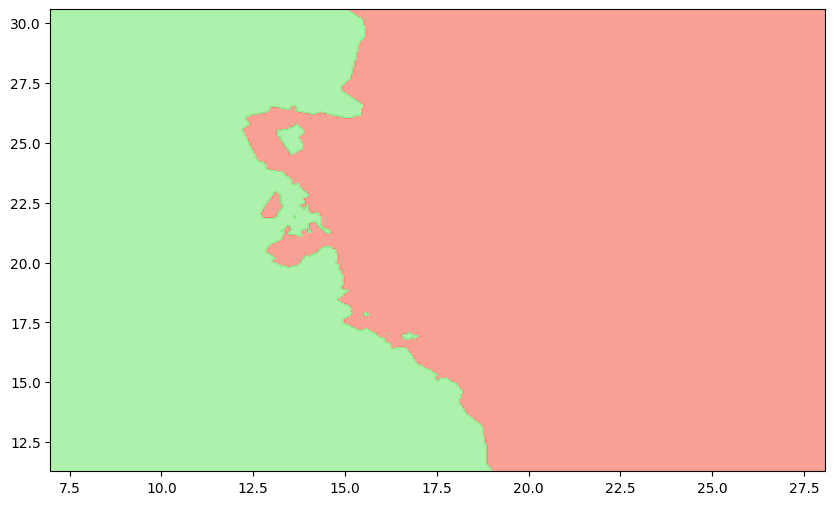

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Plot the decision areas based on the k-NN classifier
plot_decision_areas(X_val, y_val, knn, scaler)


## b) Explore different values of k to determine an optimal value.
Make a graph to show your results and decide what value of k is optimal.

C:\Users\selag\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\selag\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\selag\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\selag\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

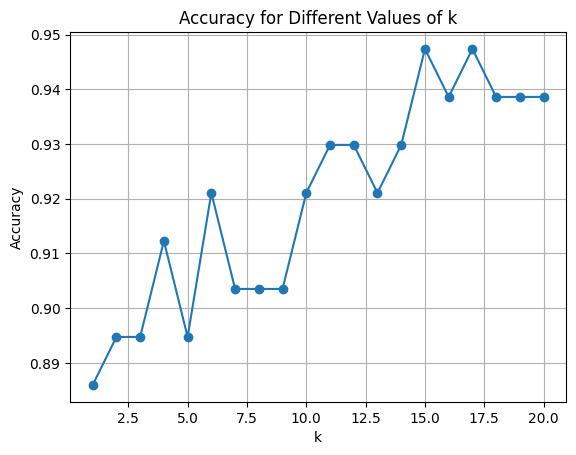

In [14]:
from sklearn.metrics import accuracy_score

# Define a range of k values to explore
k_values = range(1, 21)

# Initialize lists to store accuracies for different k values
accuracies = []

# Train and evaluate k-NN classifiers for different values of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies for different k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of k')
plt.grid(True)
plt.show()


What value of k do you choose and why?

## 2.a) Train a Decision Tree and plot the decision areas based on that model.


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

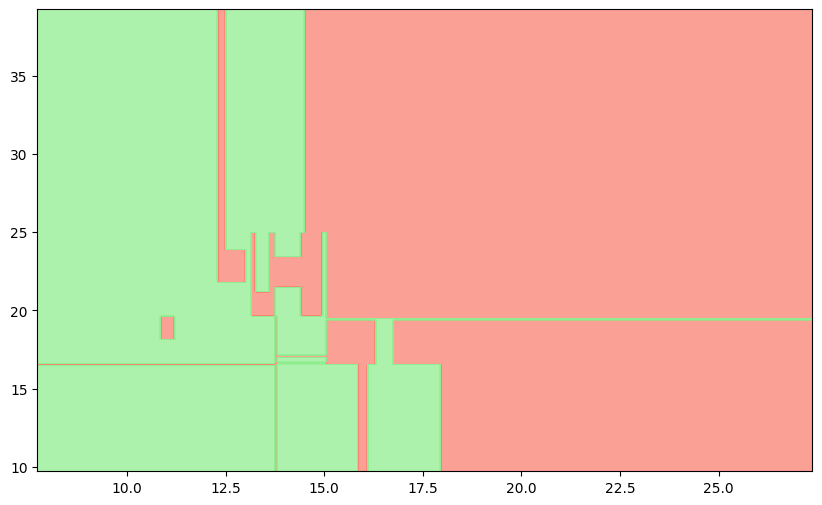

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Plot the decision areas
plot_decision_areas(X_train, y_train, decision_tree, scaler)


## b) What would be an optimal value for the depth of the Decision Tree?  
Try out many values and show your results in a graph.  
Hint: you can use parameter max_depth of DecisionTreeClassifier.


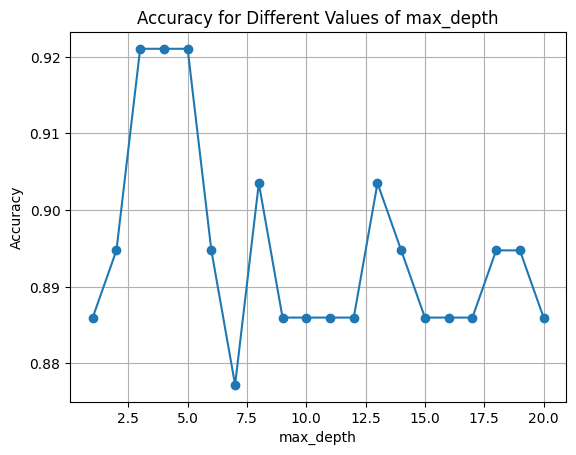

In [16]:
# Define a range of max_depth values to explore
max_depth_values = range(1, 21)

# Initialize lists to store accuracies for different max_depth values
accuracies = []

# Train and evaluate Decision Tree classifiers for different values of max_depth
for max_depth in max_depth_values:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies for different max_depth values
plt.plot(max_depth_values, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of max_depth')
plt.grid(True)
plt.show()


What depth do you choose and why?

## 3. Train a Random Forest and plot the decision areas based on that model.


C:\Users\selag\AppData\Local\Temp\ipykernel_22760\343459910.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

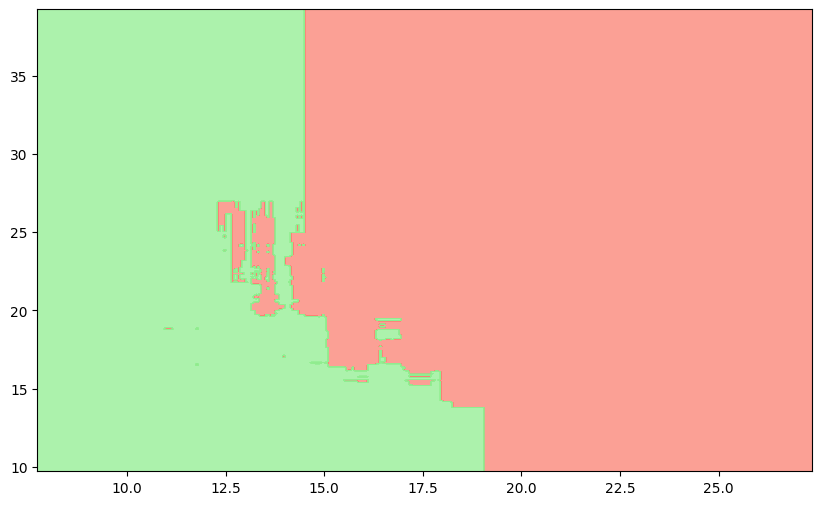

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Plot the decision areas
plot_decision_areas(X_train, y_train, random_forest, scaler)


## 4. Train a Logistic Regression and plot the decision areas based on that model.


C:\Users\selag\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

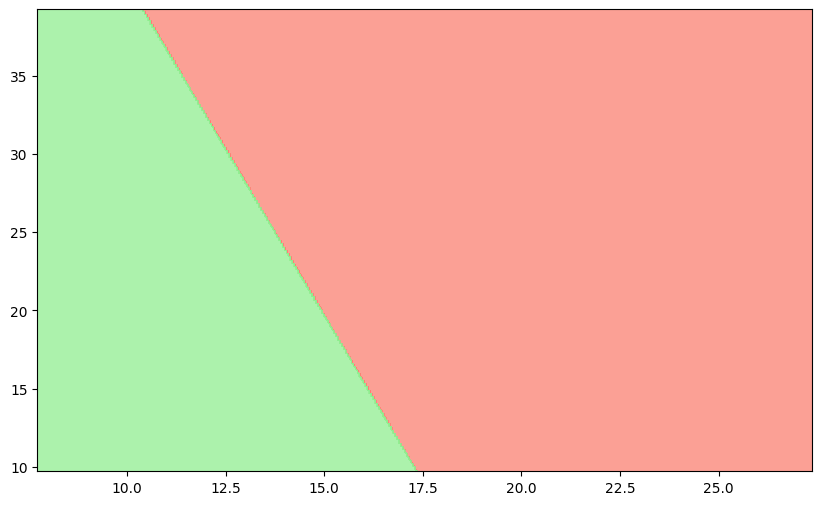

In [18]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Plot the decision areas
plot_decision_areas(X_train, y_train, logistic_regression, scaler)


## 5 . Compare the performance between all that models.
For each model, compute:
- Accuracy
- Precision
- Recall
- AUC  
Your results should be displayed in a DataFrame, with the column names specifying the model used, and the row indexes specifying the metric. (The same as you did in the regression homework).  
It is worth spending some time coding a nice scoring function for a list of models, as it will be very useful on the exam :D

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Define a scoring function to calculate evaluation metrics for a given model
def calculate_metrics(model, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'AUC': auc}

# Create a list of models and their names
models = [knn_classifier, decision_tree, random_forest, logistic_regression]
model_names = ['k-NN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

# Initialize an empty list to store the results
results = []

# Calculate evaluation metrics for each model
for model, model_name in zip(models, model_names):
    metrics = calculate_metrics(model, model_name)
    results.append(metrics)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results).set_index('Model')


### Optional: display the ROC curves of your models (on the same graph)

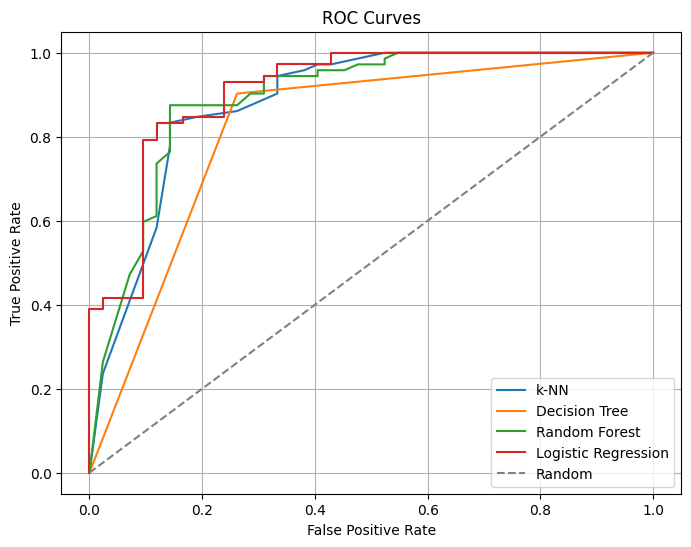

In [20]:
# Plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for model, model_name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


## 6. Pick the best model and compute its generalization performance on the test set. 

Explain what model you choose, based on what metric, and explain your choice.

In [23]:
best_model_accuracy = results_df.sort_values('Accuracy', ascending=False).iloc[0]
best_model_name = best_model_accuracy.name
print("Best Model (based on Accuracy):", best_model_name)

# Best Model (based on Accuracy): Logistic Regression

Best Model (based on Accuracy): Logistic Regression


Score the model (all metrics) on the test set

In [24]:
def calculate_metrics(model, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'AUC': auc}

# Score the best model on the test set
best_model = models[model_names.index(best_model_name)]
best_model_metrics = calculate_metrics(best_model, best_model_name)
best_model_metrics_df = pd.DataFrame([best_model_metrics]).set_index('Model')
print("\nGeneralization Performance of the Best Model:")
print(best_model_metrics_df)


'''

Generalization Performance of the Best Model:
                     Accuracy  Precision    Recall      AUC
Model                                                      
Logistic Regression  0.850877   0.839506  0.944444  0.81746
'''


Generalization Performance of the Best Model:
                     Accuracy  Precision    Recall      AUC
Model                                                      
Logistic Regression  0.850877   0.839506  0.944444  0.81746


'\n\nGeneralization Performance of the Best Model:\n                     Accuracy  Precision    Recall      AUC\nModel                                                      \nLogistic Regression  0.850877   0.839506  0.944444  0.81746\n'